In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sales_100k.csv')
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [3]:
print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Deskripsi Statistik Numerik ===")
print(df.describe())

print("\n=== Deskripsi Statistik Kategorikal ===")
print(df.describe(include=['object']))


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB
None

=== Missing Values ===
Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     

In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("\nTanggal yang gagal diparse:")
print(df[df['Date'].isnull()])

df = df.dropna(subset=['Date'])

print("\nJumlah data duplikat:", df.duplicated().sum())



Tanggal yang gagal diparse:
Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Price, Quantity, Store_Location, Salesperson_ID, Payment_Method, Customer_Age, Customer_Gender]
Index: []

Jumlah data duplikat: 0


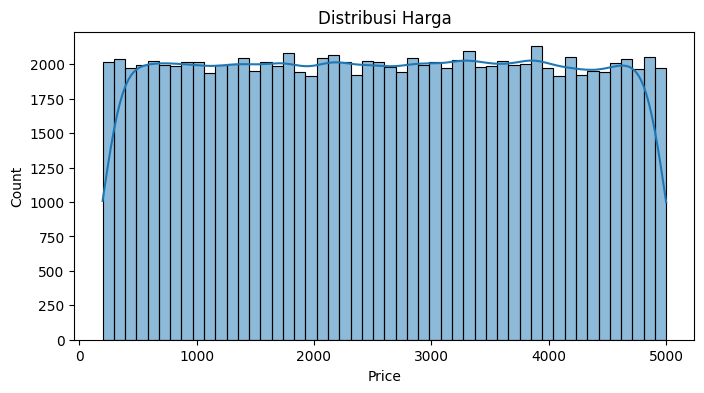

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

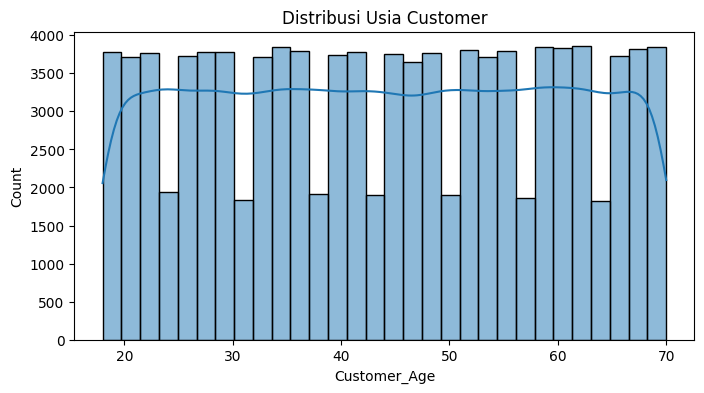

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.show()

In [7]:
print("\nNilai unik Quantity:", df['Quantity'].unique())
print(df.groupby('Payment_Method')['Price'].sum().sort_values(ascending=False))


Nilai unik Quantity: [1 4 3 5 2]
Payment_Method
Apple Pay      43560175.14
Debit Card     43465152.78
Cash           43339432.71
Credit Card    43334315.29
Google Pay     43292139.57
PayPal         42827018.47
Name: Price, dtype: float64


In [8]:
print("\n=== Distribusi Harga ===")
print("Jumlah data  :", len(df['Price']))
print("Nilai minimum:", df['Price'].min())
print("Nilai maksimum:", df['Price'].max())
print("Rata-rata    :", df['Price'].mean())
print("Median       :", df['Price'].median())
print("Standar dev  :", df['Price'].std())
print("\nKuartil:")
print(df['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\n=== Distribusi Usia Customer ===")
print("Jumlah data  :", len(df['Customer_Age']))
print("Nilai minimum:", df['Customer_Age'].min())
print("Nilai maksimum:", df['Customer_Age'].max())
print("Rata-rata    :", df['Customer_Age'].mean())
print("Median       :", df['Customer_Age'].median())
print("Standar dev  :", df['Customer_Age'].std())
print("\nKuartil:")
print(df['Customer_Age'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Distribusi Harga ===
Jumlah data  : 100000
Nilai minimum: 200.01
Nilai maksimum: 4999.81
Rata-rata    : 2598.1823396000004
Median       : 2598.575
Standar dev  : 1384.943132758159

Kuartil:
0.25    1399.7875
0.50    2598.5750
0.75    3795.9825
0.90    4521.6910
0.95    4758.7870
0.99    4949.7300
Name: Price, dtype: float64

=== Distribusi Usia Customer ===
Jumlah data  : 100000
Nilai minimum: 18
Nilai maksimum: 70
Rata-rata    : 44.04341
Median       : 44.0
Standar dev  : 15.313760827589247

Kuartil:
0.25    31.0
0.50    44.0
0.75    57.0
0.90    65.0
0.95    68.0
0.99    70.0
Name: Customer_Age, dtype: float64


In [9]:
Q1_age = df['Customer_Age'].quantile(0.25)
Q3_age = df['Customer_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

outliers_age = df[(df['Customer_Age'] > upper_bound_age) | (df['Customer_Age'] < lower_bound_age)]

print("\n=== Outliers Customer_Age ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_age))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_age) / len(df)))
print("Rentang wajar usia: {:.1f} - {:.1f}".format(lower_bound_age, upper_bound_age))
print("Nilai usia minimum:", df['Customer_Age'].min())
print("Nilai usia maksimum:", df['Customer_Age'].max())

Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] > upper_bound_qty) | (df['Quantity'] < lower_bound_qty)]

print("\n=== Outliers Quantity ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_qty))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_qty) / len(df)))
print("Rentang wajar Quantity: {:.1f} - {:.1f}".format(lower_bound_qty, upper_bound_qty))
print("Nilai Quantity minimum:", df['Quantity'].min())
print("Nilai Quantity maksimum:", df['Quantity'].max())


=== Outliers Customer_Age ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar usia: -8.0 - 96.0
Nilai usia minimum: 18
Nilai usia maksimum: 70

=== Outliers Quantity ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar Quantity: -1.0 - 7.0
Nilai Quantity minimum: 1
Nilai Quantity maksimum: 5


In [11]:
pip install pytorch-tabnet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [12]:
print("Jumlah data:", df.shape)
print("Kolom:", df.columns)

Jumlah data: (100000, 11)
Kolom: Index(['Sale_ID', 'Date', 'Customer_ID', 'Bike_Model', 'Price', 'Quantity',
       'Store_Location', 'Salesperson_ID', 'Payment_Method', 'Customer_Age',
       'Customer_Gender'],
      dtype='object')


In [42]:
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

In [43]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X):
        df = X.copy()
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['DayOfWeek'] = df['Date'].dt.dayofweek
        df['IsWeekend'] = df['DayOfWeek'].isin([5,6]).astype(int)
        df['Total_Sale'] = df['Price'] * df['Quantity']
        df['Price_per_Quantity'] = df['Price'] / (df['Quantity']+1)
        df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[17,25,35,45,55,65,75], labels=False)
        df.drop(['Date'], axis=1, inplace=True)
        return df

In [44]:
class MetaFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.customer_tx_count = X.groupby('Customer_ID').size().to_dict()
        self.salesperson_tx_count = X.groupby('Salesperson_ID').size().to_dict()
        self.model_popularity = X.groupby('Bike_Model').size().to_dict()
        return self
    def transform(self, X):
        df = X.copy()
        df['Customer_Frequency'] = df['Customer_ID'].map(self.customer_tx_count).fillna(0)
        df['Salesperson_Frequency'] = df['Salesperson_ID'].map(self.salesperson_tx_count).fillna(0)
        df['Model_Popularity'] = df['Bike_Model'].map(self.model_popularity).fillna(0)
        return df

In [45]:
categorical_cols = ['Bike_Model','Store_Location','Payment_Method']
numeric_cols = [
    'Price','Quantity','Customer_Age','Year','Month','DayOfWeek','IsWeekend',
    'Total_Sale','Price_per_Quantity','Age_Group',
    'Customer_Frequency','Salesperson_Frequency','Model_Popularity'
]

In [46]:
categorical_cols = ['Bike_Model','Store_Location','Payment_Method']
numeric_cols = [
    'Price','Quantity','Customer_Age','Year','Month','DayOfWeek','IsWeekend',
    'Total_Sale','Price_per_Quantity','Age_Group',
    'Customer_Frequency','Salesperson_Frequency','Model_Popularity'
]

In [47]:
full_pipeline = Pipeline([
    ('feature_eng', FeatureEngineering()),
    ('meta_features', MetaFeatures()),
    ('preprocessor', preprocessor)
])

In [48]:
le_target = LabelEncoder()
df['Customer_Gender_encoded'] = le_target.fit_transform(df['Customer_Gender'])

# Split before fit (safe leakage)
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Customer_Gender','Customer_Gender_encoded','Sale_ID'], axis=1),
    df['Customer_Gender_encoded'],
    test_size=0.2, random_state=42, stratify=df['Customer_Gender_encoded']
)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer

# numeric dan categorical
numeric_cols = [
    'Price','Quantity','Customer_Age','Year','Month','DayOfWeek','IsWeekend',
    'Total_Sale','Price_per_Quantity','Age_Group',
    'Customer_Frequency','Salesperson_Frequency','Model_Popularity'
]
categorical_cols = ['Bike_Model','Store_Location','Payment_Method']

# pipeline numeric: imputasi + scaling + polynomial
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# pipeline categorical: imputasi (rare, tapi aman) + onehot
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# full preprocessor
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# final pipeline
full_pipeline = Pipeline([
    ('feature_eng', FeatureEngineering()),
    ('meta_features', MetaFeatures()),
    ('preprocessor', preprocessor)
])

# fit
full_pipeline.fit(X_train)
X_train_transformed = full_pipeline.transform(X_train)
print('✅ Shape after transform:', X_train_transformed.shape)


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Age_Group']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\impute\_base.py:635: UserWarning: Skipping features without any observed values: ['Age_Group']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


✅ Shape after transform: (80000, 110)


In [61]:
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Split untuk validasi
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_transformed, y_train,
    test_size=0.2, random_state=42, stratify=y_train
)

In [64]:
clf = TabNetClassifier(
    n_d=16, n_a=16, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),  # lebih kecil dr sebelumnya
    mask_type='entmax',
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1
)

clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=300,      # naikkan dari 100 ke 300
    patience=50,         # naikkan dari 10 ke 50
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)


C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.83072 | val_accuracy: 0.49469 |  0:00:19s
epoch 1  | loss: 0.69841 | val_accuracy: 0.49838 |  0:00:37s
epoch 2  | loss: 0.69591 | val_accuracy: 0.50494 |  0:00:58s
epoch 3  | loss: 0.69533 | val_accuracy: 0.50187 |  0:01:12s
epoch 4  | loss: 0.695   | val_accuracy: 0.49931 |  0:01:28s
epoch 5  | loss: 0.69463 | val_accuracy: 0.50031 |  0:01:47s
epoch 6  | loss: 0.6948  | val_accuracy: 0.49919 |  0:02:06s
epoch 7  | loss: 0.69493 | val_accuracy: 0.50081 |  0:02:25s
epoch 8  | loss: 0.6945  | val_accuracy: 0.50106 |  0:02:44s
epoch 9  | loss: 0.69437 | val_accuracy: 0.50069 |  0:03:01s
epoch 10 | loss: 0.69452 | val_accuracy: 0.50594 |  0:03:16s
epoch 11 | loss: 0.69438 | val_accuracy: 0.49844 |  0:03:31s
epoch 12 | loss: 0.69423 | val_accuracy: 0.50369 |  0:03:45s
epoch 13 | loss: 0.69432 | val_accuracy: 0.5045  |  0:04:04s
epoch 14 | loss: 0.69421 | val_accuracy: 0.50081 |  0:04:22s
epoch 15 | loss: 0.69412 | val_accuracy: 0.50081 |  0:04:40s
epoch 16 | loss: 0.69398

C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [65]:
# Predict dan evaluasi
y_pred = clf.predict(X_val)
print("\n✅ Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))



✅ Accuracy: 0.5098125
              precision    recall  f1-score   support

           0       0.51      0.63      0.56      8036
           1       0.51      0.39      0.44      7964

    accuracy                           0.51     16000
   macro avg       0.51      0.51      0.50     16000
weighted avg       0.51      0.51      0.50     16000



In [69]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [70]:
from catboost import CatBoostClassifier

In [72]:
df[categorical_cols] = df[categorical_cols].astype('category')

In [78]:
# Pakai fitur selain target
X = df.drop(['Customer_Gender', 'Customer_Gender_encoded'], axis=1)

# Target
y = df['Customer_Gender_encoded']

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", cat_cols)


Categorical columns: ['Bike_Model', 'Store_Location', 'Payment_Method']


In [79]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [80]:
clf_cat = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    eval_metric='Accuracy',
    cat_features=cat_cols,        # <- penting: info kolom kategorikal
    verbose=100,
    random_state=42
)

clf_cat.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    use_best_model=True
)

0:	learn: 0.5113875	test: 0.5007000	best: 0.5007000 (0)	total: 401ms	remaining: 3m 19s
100:	learn: 0.5302500	test: 0.5048500	best: 0.5061500 (93)	total: 14.7s	remaining: 58.2s
200:	learn: 0.5412500	test: 0.5058500	best: 0.5061500 (93)	total: 29.1s	remaining: 43.3s
300:	learn: 0.5601000	test: 0.5057000	best: 0.5100500 (232)	total: 45.5s	remaining: 30.1s
400:	learn: 0.5787125	test: 0.5035500	best: 0.5100500 (232)	total: 1m 2s	remaining: 15.5s
499:	learn: 0.5905625	test: 0.5039500	best: 0.5100500 (232)	total: 1m 19s	remaining: 0us

bestTest = 0.51005
bestIteration = 232

Shrink model to first 233 iterations.


In [81]:
y_pred = clf_cat.predict(X_val)

print("\n✅ Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


✅ Accuracy: 0.51005
              precision    recall  f1-score   support

           0       0.51      0.62      0.56     10045
           1       0.51      0.40      0.45      9955

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000

